Sumber : https://www.kaggle.com/anshulchaudhary/heart-attack-prediction-using-deep-learning-ann/notebook

Import data set dan library 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from random import shuffle

import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix
print(tf.__version__)

2.3.1


Processing data set

In [2]:
df = pd.read_csv(r'C:\Users\nana\Downloads\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df = np.take(df,np.random.permutation(df.shape[0]),axis=0);
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0


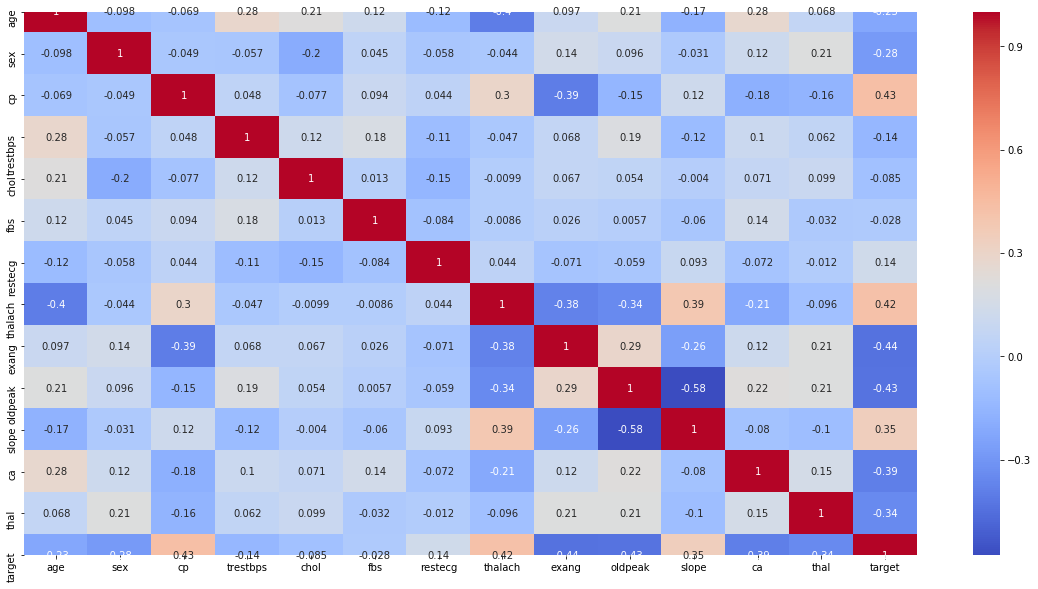

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [6]:
x = df.iloc[:,:13].values
y = df.iloc[:,13].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

MODEL ANN

<< Compiling Model >>
Epoch 1/200
8/8 [==============================] - 0s 5ms/step - loss: 0.7469 - accuracy: 0.4273
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 0.7313 - accuracy: 0.4229
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7194 - accuracy: 0.4141
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 0.7078 - accuracy: 0.4185
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6987 - accuracy: 0.4185
Epoch 6/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.4097
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.4229
Epoch 8/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.4581
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.5330
Epoch 10/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.6300
Epoch 1

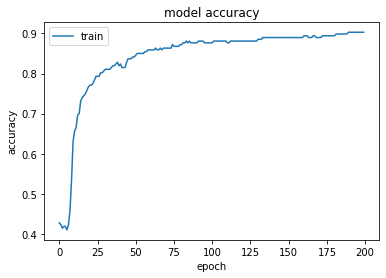

In [7]:
model = Sequential()

model.add(Dense(6, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
print('<< Compiling Model >>')

history_1 = model.fit(x_train,y_train ,batch_size = 32 ,epochs = 200)
len(model.weights)

plt.plot(history_1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


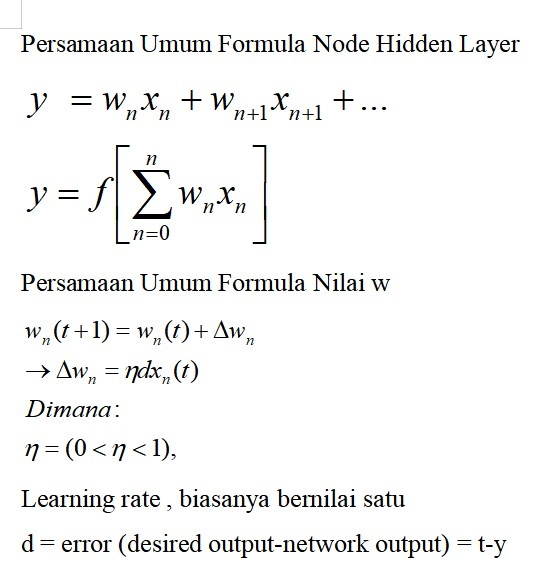

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 56        
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 149
Trainable params: 149
Non-trainable params: 0
_________________________________________________________________


Menampilkan nilai weight

In [8]:
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(13, 6) dtype=float32, numpy=
array([[ 0.33483267,  0.07276956, -0.72142726,  0.4264146 , -0.06958544,
        -0.34002843],
       [-0.31823143, -0.43176305, -0.87969494, -0.42113358,  0.00302067,
        -0.22436798],
       [ 0.44380772, -0.29286242,  0.07392238, -0.3595967 , -0.37023735,
         0.24233371],
       [-0.06530602, -0.00361467, -0.19749188,  0.44404423, -0.29224265,
         0.07159195],
       [-0.4144432 , -0.2522412 ,  0.5014382 , -0.55745816,  0.40522224,
        -0.41879895],
       [ 0.22214764, -0.29734468,  0.18462819,  0.30221626,  0.48185298,
         0.7172188 ],
       [ 0.33681086,  0.14599565,  0.06082967,  0.10967154, -0.20536555,
         0.47571057],
       [ 0.06126365,  0.20113589,  0.1375296 ,  0.3541813 , -0.22925192,
         0.3359927 ],
       [ 0.06897813,  0.3692993 , -0.1981115 ,  0.2806697 ,  0.39551967,
        -0.37801903],
       [-0.1442328 ,  0.6484513 , -0.37285674, -0.5091272 ,  0.6978183 ,
     

ANN pada data testing

In [9]:
y_pred_1 = model.predict(x_test)
y_pred_1 = (y_pred_1 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_1)
print(cm)
print(accuracy_score(y_test, y_pred_1))

pred_1 = 100*accuracy_score(y_test,y_pred_1)
print('percentage Accuracy : ',pred_1)

[[27  9]
 [ 6 34]]
0.8026315789473685
percentage Accuracy :  80.26315789473685


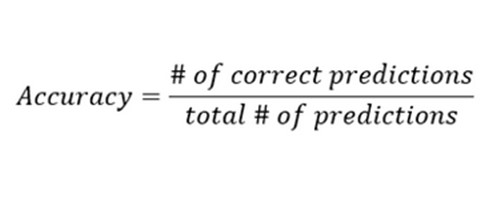